# How Well Do Jobs and Skills Pay for Data Analysts?
## Methodology
1.Evaluate Median Salary for Top 6 Data Jobs
Identify the six most common data-related job titles and calculate their median salaries to understand earning potential by role.

2.Find Median Salary per Skill for Data Analysts
For each skill, compute the median salary of job postings that mention it—this highlights which skills are most financially valuable.

3.Visualize Salary Trends

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Huawei\.cache\kagglehub\datasets\ankushpanday1\global-population-dataset-20142024\versions\1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Salary Distribution by Job Title
Filter our data to only include salary values from the United States.

In [2]:
# filter for the job titles and country
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [3]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

## Plot Salary Distributions
Plot the top 6 job titles salary distributions using a box plot.

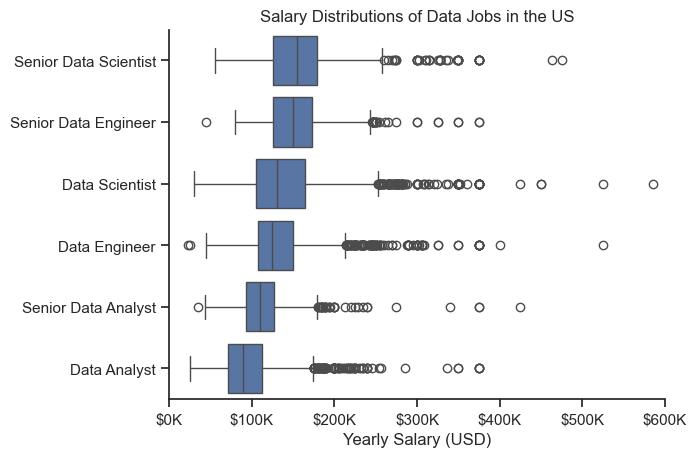

In [4]:
# Set theme and remove top/right spines
sns.set_theme(style='ticks')
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.despine()

# Add titles and labels
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')

# Set x-axis limits and format ticks
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x / 1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

# Show the plot
plt.show()

### Investigate Median Salary vs Skill for Data Analysts
This step filters the dataset to include only job postings for Data Analysts located in the United States, resulting in a new DataFrame called `df_DA_US`. It then:

1.Drops rows with missing salary values (`NaN` in `salary_year_avg`).

2.Uses the explode() method on the `job_skills` column to ensure each skill is in its own row.

3.Displays the first five entries of the `salary_year_avg` and `job_skills` columns for inspection.



In [5]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


### Determine The Highest Paid Skills and Most Demanded Skills
Gets the top ten highest-paying skills for Data Analysts by calculating the median salary for each skill listed in the `df_DA_US`. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame (`df_DA_top_pay`) with a reset index and a renamed salary column labeled `median_salary`.

In [6]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


Calculates the count and median salary for each skill in `df_DA_US`. It groups the data by `job_skills`, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [7]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


### Visualizing Skill Value and Demand
We create two horizontal bar charts to analyze:

`Highest Paid Skills` – Based on the median salary for each skill among Data Analyst roles.

`Most In-Demand Skills` – Based on the frequency of each skill in job postings.



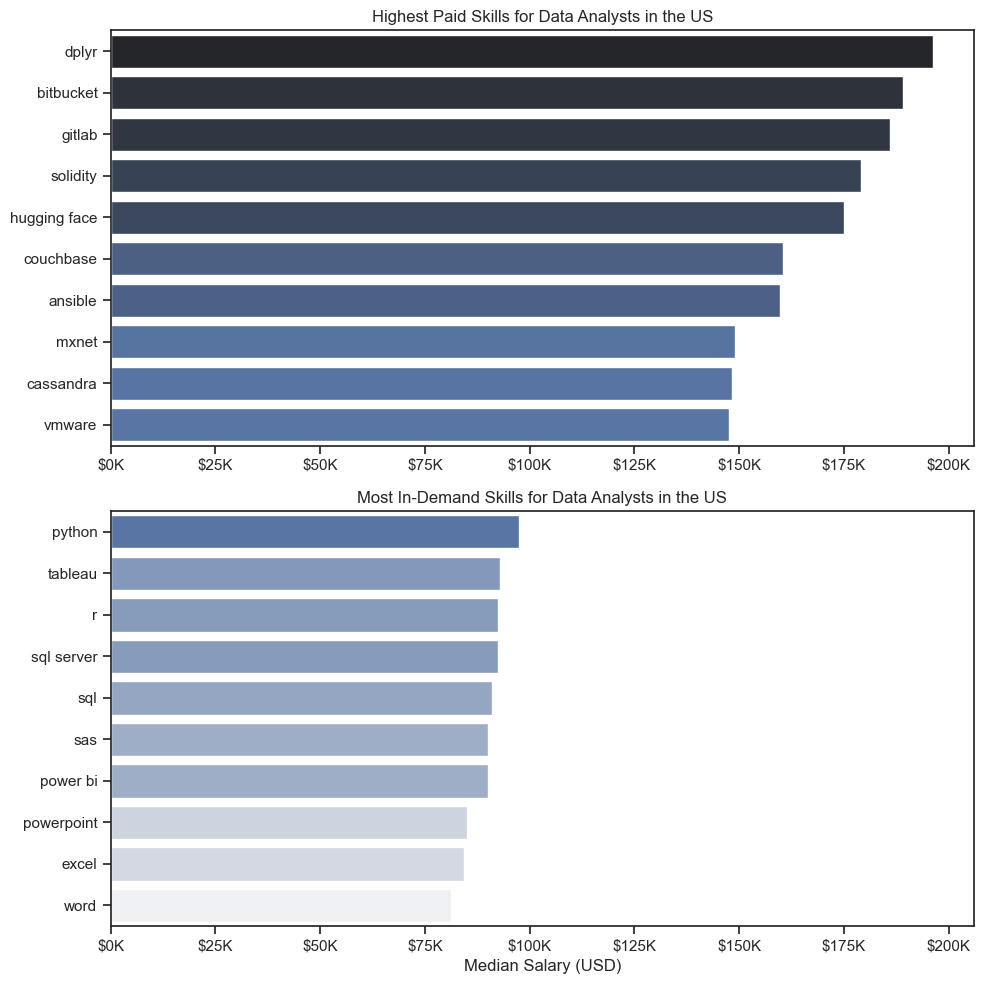

In [8]:
# Set consistent style
sns.set_theme(style='ticks')

# Create a 2-row subplot layout
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# ---- Top 10 Highest Paid Skills ----
sns.barplot(
    data=df_DA_top_pay, 
    x='median', 
    y=df_DA_top_pay.index, 
    hue='median', 
    ax=ax[0], 
    palette='dark:b_r'
)
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x / 1000)}K'))

# ---- Top 10 Most In-Demand Skills ----
sns.barplot(
    data=df_DA_skills, 
    x='median', 
    y=df_DA_skills.index, 
    hue='median', 
    ax=ax[1], 
    palette='light:b'
)
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x / 1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())  # Keep x-axis scale consistent

# Adjust layout and display
plt.tight_layout()
plt.show()
